In [2]:
#import packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import beta 
import arviz as az

Equal Tailed Interval: 0.096,0.527 
Highest Density 94% Intervals: 0.080,0.503


Text(0.5, 1.0, 'Posterior Distribution for θ(4, 10)')

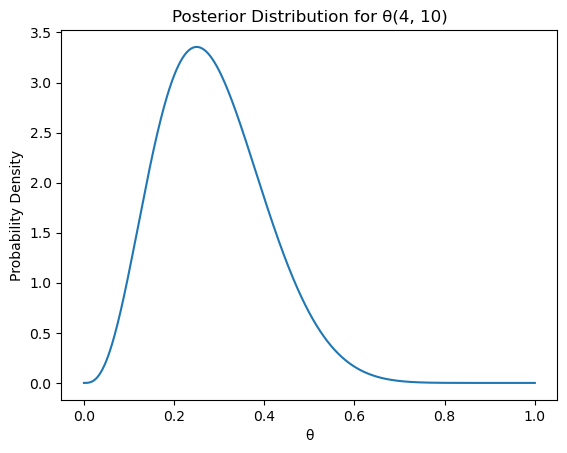

In [3]:
# Choosing the Prior and getting Posterior
n=12
y=3
a_prior=1
b_prior=1
p_theta_given_y=beta(a_prior+y,b_prior+n-y)

#Part A ------------------------

#Equal Tailed Interval
eti=(p_theta_given_y.ppf(0.03),p_theta_given_y.ppf(0.97))
print(f"Equal Tailed Interval: {eti[0]:.3f},{eti[1]:.3f} ")

#Highest Density 94% Interval
x=np.linspace(0,1,1000) 
pdf=beta.pdf(x,a_prior+y,b_prior+n-y)
pdf=pdf/pdf.sum()
indexes=pdf.argsort()[::-1]
clt=0 # cumulative
vals_HDI=[]
for i in indexes:
    clt+=pdf[i]
    if clt>0.94:
        break
    else:
        vals_HDI.append(x[i])
print(f"Highest Density 94% Intervals: {min(vals_HDI):.3f},{max(vals_HDI):.3f}")

pdf=beta.pdf(x,a_prior+y,b_prior+n-y)
plt.plot(x,pdf)
plt.xlabel("θ")
plt.ylabel("Probability Density")
plt.title(f"Posterior Distribution for θ({a_prior+y}, {b_prior+n-y})")

In [43]:
# Part B

samples=15000
probabilities=beta(a_prior+y,b_prior+n-y).rvs(samples)

posterior_predictive = stats.binom(p=probabilities,n=12).rvs()

prob_of_1=np.mean(posterior_predictive>=1)
print(f"Probability Of Atleast One is: {prob_of_1:.3f}")

Probability Of Atleast One is: 0.941
